# Tarea estadística - Boostrap

**Alumno:** Axel Daniel Malváez Flores

## Ejercicio 1

Primero descargamos la librería bootstrap

In [ ]:
#!pip install bootstrap_stat

In [ ]:
# Libraries that we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bootstrap
import bootstrap_stat as bp
from bootstrap_stat import datasets as d
import random as rd

sns.set_style('darkgrid')
sns.set_palette('pastel')


sample = d.law_data(full = False)
sampleAll = d.law_data(full = True)

Obtén:

La correlación muestral, $\hat{\rho_n}$ (estimador plug-in de la correlación), entre las variables LSAT y GPA. Posteriormente vía un re-muestreo Bootstrap (obviamente sobre la muestra) calcula un intervalo del $95\%$ de confianza para la correlación poblacional $\rho$. ¿Este intervalo cubre al valor real? (puedes obtener $\rho$ usando los datos de la población completa y calculando la correlación).

Bootstrap: Dada nuestra muestra remuestreamos

In [ ]:
LSAT = sample.LSAT.values
GPA = sample.GPA.values

tuples = np.array(list(zip(LSAT, GPA)))
tuplesAll = np.array(list(zip(sampleAll.LSAT.values, sampleAll.GPA.values)))

In [ ]:
def correlation(x, y):
    return np.corrcoef(x,y)[0,1]

In [ ]:
# Correlación real n =15
print(correlation(LSAT, GPA))

# Correlación real n = 82
print(correlation(sampleAll.LSAT.values, sampleAll.GPA.values))

0.7763744912894072
0.760007810893591


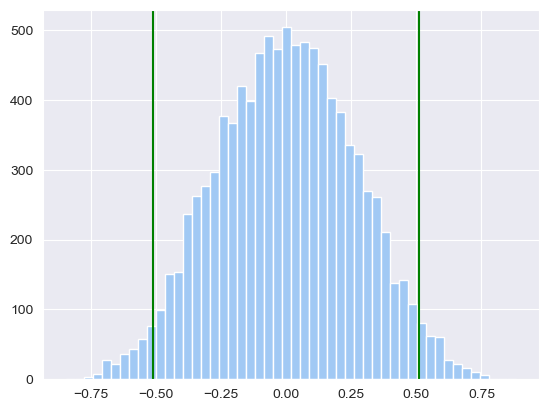

In [ ]:
B = 10000

correlation_bootstrap = []

for i in range(B):
    sample_1 = np.random.choice(LSAT, size=len(LSAT), replace=True)
    sample_2 = np.random.choice(GPA, size=len(GPA), replace=True)
    
    corr_bootstrap = correlation(sample_1, sample_2)
    correlation_bootstrap.append(corr_bootstrap)
    
plt.hist(correlation_bootstrap, bins=50)
plt.axvline(-0.51, color='green')
plt.axvline(0.51, color='green')

In [ ]:
lower = np.percentile(correlation_bootstrap, 2.5)
upper = np.percentile(correlation_bootstrap, 97.5)

print(f"Intervalo de confianza del 95%: ({lower:.2f}, {upper:.2f})")

Intervalo de confianza del 95%: (-0.51, 0.52)


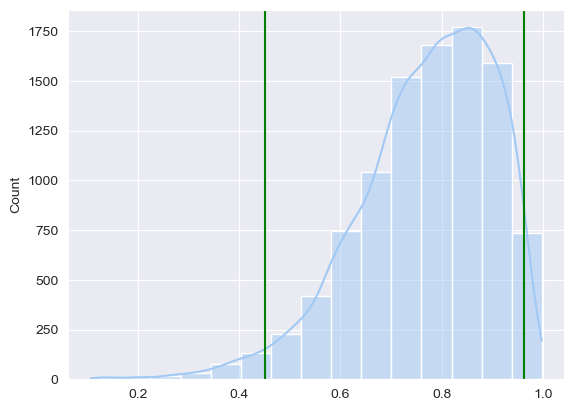

In [ ]:
B = 10000

correlation_bootstrap = []

for i in range(B):
    indices = np.random.choice(len(tuples), size=len(tuples), replace=True)
    vals = tuples[indices]
    
    corr_bootstrap = correlation(vals[:,1], vals[:,0])
    correlation_bootstrap.append(corr_bootstrap)

low = np.percentile(correlation_bootstrap, 2.5)
upper = np.percentile(correlation_bootstrap, 97.5)

sns.histplot(correlation_bootstrap, bins=15, kde=True)
plt.axvline(low, color='green')
plt.axvline(upper, color='green')

In [ ]:
lower = np.percentile(correlation_bootstrap, 2.5)
upper = np.percentile(correlation_bootstrap, 97.5)

print(f"Intervalo de confianza del 95%: ({lower:.2f}, {upper:.2f})")

Intervalo de confianza del 95%: (0.45, 0.96)


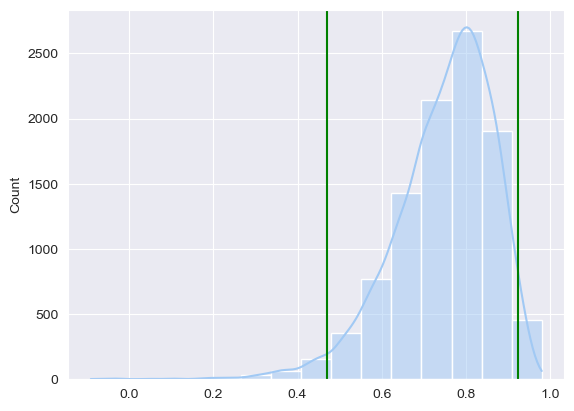

In [ ]:
B = 10000

correlation_bootstrap = []

for i in range(B):
    indices = np.random.choice(len(tuplesAll), size=15, replace=False)
    vals = tuplesAll[indices]
    
    corr_bootstrap = correlation(vals[:,1], vals[:,0])
    correlation_bootstrap.append(corr_bootstrap)

low = np.percentile(correlation_bootstrap, 2.5)
upper = np.percentile(correlation_bootstrap, 97.5)

sns.histplot(correlation_bootstrap, kde=True, bins=15)
plt.axvline(low, color='green')
plt.axvline(upper, color='green')

In [ ]:
lower = np.percentile(correlation_bootstrap, 2.5)
upper = np.percentile(correlation_bootstrap, 97.5)

print(f"Intervalo de confianza del 95%: ({lower:.2f}, {upper:.2f})")

Intervalo de confianza del 95%: (0.47, 0.92)


## Ejercicio 2

In [ ]:
from scipy.stats import norm

In [ ]:
# Skewness
def skewness(x):
    return np.mean((x - np.mean(x))**3) / np.mean((x - np.mean(x))**2)**1.5

In [ ]:
n = 50
Y = np.random.normal(0, 1, n)
X = np.exp(Y)

(array([5., 0., 4., 7., 3., 3., 2., 2., 1., 3., 1., 3., 2., 0., 1., 0., 3.,
        2., 1., 2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 2.]),
 array([0.13640416, 0.32203736, 0.50767056, 0.69330377, 0.87893697,
        1.06457017, 1.25020337, 1.43583657, 1.62146978, 1.80710298,
        1.99273618, 2.17836938, 2.36400258, 2.54963579, 2.73526899,
        2.92090219, 3.10653539, 3.29216859, 3.4778018 , 3.663435  ,
        3.8490682 , 4.0347014 , 4.2203346 , 4.40596781, 4.59160101,
        4.77723421, 4.96286741, 5.14850061, 5.33413382, 5.51976702,
        5.70540022, 5.89103342, 6.07666662, 6.26229983, 6.44793303,
        6.63356623, 6.81919943, 7.00483264, 7.19046584, 7.37609904,
        7.56173224, 7.74736544, 7.93299865, 8.11863185, 8.30426505,
        8.48989825, 8.67553145, 8.86116466, 9.04679786, 9.23243106,
        9.41806426]),
 <BarContainer object of 50 artists>)

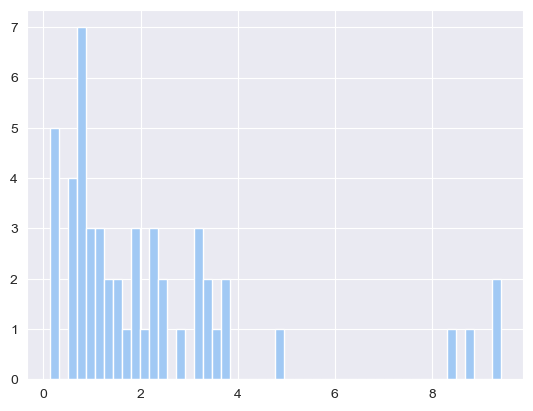

In [ ]:
plt.hist(X, bins=50)

In [ ]:
# Simetria real [exp(var) + 2]* np.sqrt(expo(var) - 1)
(np.exp(1) + 2) * np.sqrt(np.exp(1) - 1)

6.184877138632554

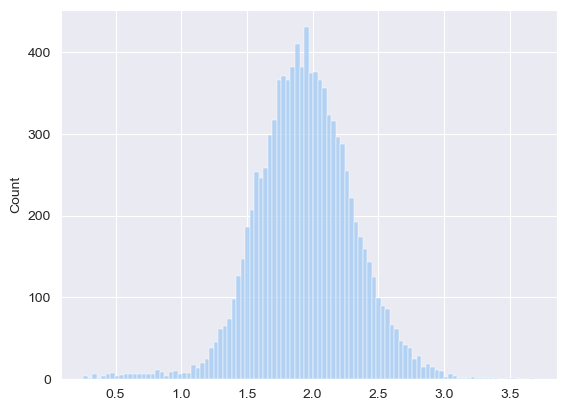

In [ ]:
# boostrap
B = 10000

sk_bootstrap = []

for i in range(B):
    sample_1 = np.random.choice(X, size=len(X), replace=True)
    sk_b = skewness(sample_1)
    sk_bootstrap.append(sk_b)
    
sns.histplot(sk_bootstrap, bins=100)
plt.show()

In [ ]:
#Creamos una función la cual nos calcule el intervalo de confianza con los distintos métodos vistos en clase.
def Int_puntual(alpha,bootstrap,est_puntual):
    z = norm.ppf(1-alpha/2,0,1)
    error_est = np.std(bootstrap)
    intervalo = [est_puntual - z*error_est, est_puntual + z*error_est]
    return intervalo 
def Int_perecentiles(alpha,bootstrap):
    intervalo = np.quantile(bootstrap, [alpha/2, 1-alpha/2])
    return intervalo.tolist()
def Int_pivotal(alpha,bootstrap,est_puntual):
    intervalo = 2*est_puntual - np.quantile(bootstrap, [alpha/2, 1-alpha/2])
    intervalo = intervalo.tolist()
    return [intervalo[1],intervalo[0]]

In [ ]:
Int_puntual(0.05,sk_bootstrap,skewness(X))

[1.2338984774210076, 2.7140651200218393]

In [ ]:
Int_perecentiles(0.05,sk_bootstrap)

[1.228601254317521, 2.6883379229406787]

In [ ]:
Int_pivotal(0.05,sk_bootstrap,skewness(X))

[1.2596256745021681, 2.7193623431253258]